In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

### Preprocessing track features

In [15]:
df_track_data=pd.read_csv(".\\data\\raw\\raw_track_features.csv")
df_track_data.info()
df_track_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,...,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,...,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,...,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,...,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,...,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,...,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,...,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [16]:
#label encoding
def label_encoding(column, label_encoder=None):
    if label_encoder is None:
        label_encoder = LabelEncoder()
        column_encoded = label_encoder.fit_transform(column)
    else:
        column_encoded = label_encoder.transform(column)
    df_mapping = pd.DataFrame({
        "label": label_encoder.classes_,
        "code": label_encoder.transform(label_encoder.classes_)
    })
    return column_encoded, df_mapping, label_encoder

In [17]:
df_track_data['mode'],mode_mapping,_ = label_encoding(df_track_data['mode'])

df_track_data['track_id'],track_id_mapping,track_id_encoder = label_encoding(df_track_data['track_id'])
mode_mapping.to_csv(".\\data\\preprocessed\\mode_mapping.csv", index=False)
track_id_mapping.to_csv(".\\data\\preprocessed\\track_id_mapping.csv", index=False)

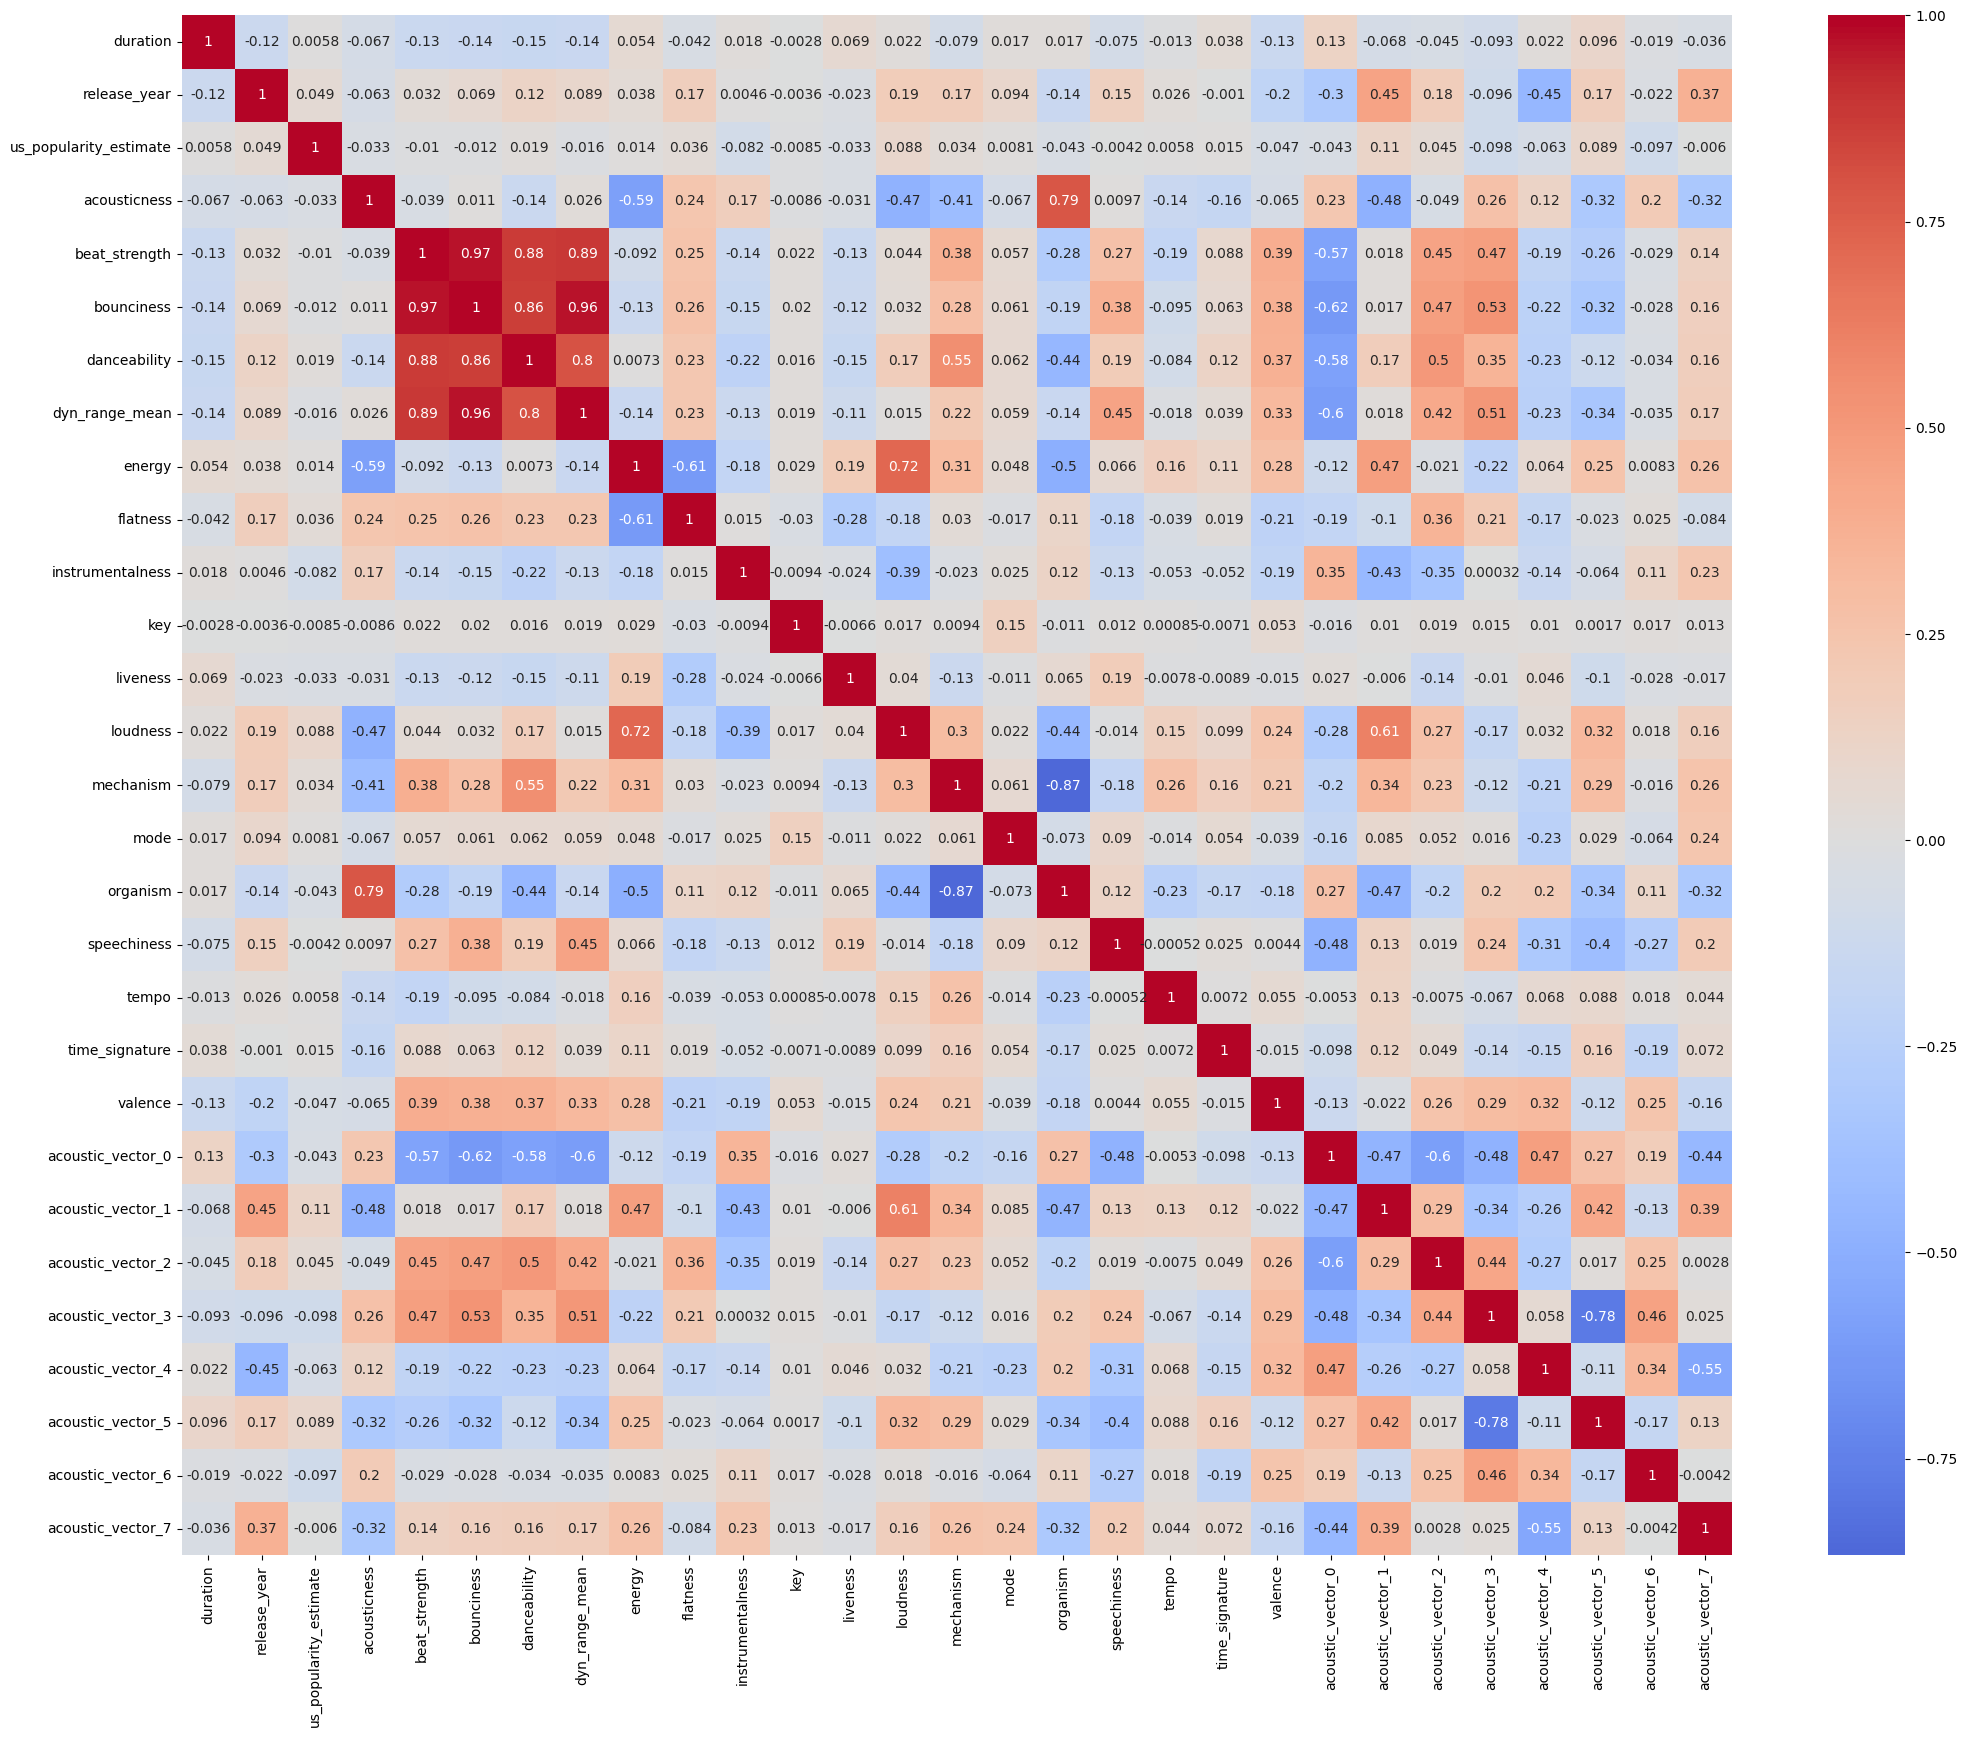

In [18]:
matrice_corr_track_data=df_track_data.drop(columns=['track_id']).corr()
plt.figure(figsize=(25, 20))
sns.heatmap(matrice_corr_track_data, annot=True, cmap='coolwarm', center=0)
plt.show()

In [19]:
#retrait des corrélation >0.75, des "acoustic vector" et des données qui ne sont pas liées au spectre sonore (popularité, date, etc)
df_simple_track_data=df_track_data[['track_id','acousticness','danceability','duration','energy','flatness','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]

In [20]:
#standardisation des features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['acousticness','danceability','duration','energy','flatness','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
df_simple_track_data[features_to_scale] = scaler.fit_transform(df_simple_track_data[features_to_scale])

C:\Users\glenn\AppData\Local\Temp\ipykernel_29548\3467794630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple_track_data[features_to_scale] = scaler.fit_transform(df_simple_track_data[features_to_scale])


### Preprocessing listening sessions

In [21]:
df_sessions=pd.read_csv(".\\data\\raw\\raw_sessions.csv")
df_sessions.info()
df_sessions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [22]:
df_sessions.drop(columns=['date','premium','context_type','hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback','hist_user_behavior_is_shuffle','hist_user_behavior_reason_start','hist_user_behavior_reason_end','context_switch','no_pause_before_play','short_pause_before_play','long_pause_before_play','hour_of_day'], inplace=True)

In [23]:
#pour session_id
df_sessions['session_id'], df_session_id_mapping, session_id_encoder = label_encoding(df_sessions['session_id'])
df_session_id_mapping.to_csv(".\\data\\preprocessed\\session_id_mapping.csv", index=False)

#pour track_id_clean
df_sessions['track_id_clean'], _,_ = label_encoding(df_sessions['track_id_clean'],track_id_encoder)

#pour les boolean
bool_col=['skip_1','skip_2','skip_3','not_skipped']
bool_mapping = {False: 0, True: 1}
df_sessions[bool_col] = (
    df_sessions[bool_col]
    .replace(bool_mapping)
    .infer_objects(copy=False)
)

C:\Users\glenn\AppData\Local\Temp\ipykernel_29548\806145150.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(bool_mapping)


In [24]:
df_sessions

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped
0,0,1,20,890,0,0,0,1
1,0,2,20,28794,0,0,0,1
2,0,3,20,49953,0,0,0,1
3,0,4,20,7133,0,0,0,1
4,0,5,20,20100,0,0,0,1
...,...,...,...,...,...,...,...,...
167875,9999,16,20,10728,0,0,0,1
167876,9999,17,20,33884,0,0,0,1
167877,9999,18,20,48781,0,0,0,1
167878,9999,19,20,44710,0,0,0,1


In [25]:
#créer une nouvelle colonne skip_intensity égale à la somme des skip_1, skip_2 et skip_3
df_sessions['skip_intensity'] = df_sessions[['skip_1', 'skip_2', 'skip_3']].sum(axis=1)
df_sessions.drop(columns=['skip_1','skip_2','skip_3','not_skipped'], inplace=True)

In [29]:
#supprimer les lignes avec skip_intensity >1
df_sessions = df_sessions[df_sessions['skip_intensity'] <= 1]

In [31]:
df_sessions

,session_id,session_position,session_length,track_id_clean,skip_intensity
0,0,1,20,890,0
1,0,2,20,28794,0
2,0,3,20,49953,0
3,0,4,20,7133,0
4,0,5,20,20100,0
...,...,...,...,...,...
167875,9999,16,20,10728,0
167876,9999,17,20,33884,0
167877,9999,18,20,48781,0
167878,9999,19,20,44710,0


In [32]:
# recalcul la session_position après suppression des lignes
df_sessions['session_position'] = df_sessions.groupby('session_id').cumcount() + 1
# recalcul la session_length en fonction
df_sessions['session_length'] = df_sessions.groupby('session_id')['session_id'].transform('count')

C:\Users\glenn\AppData\Local\Temp\ipykernel_29548\351680783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions['session_position'] = df_sessions.groupby('session_id').cumcount() + 1
C:\Users\glenn\AppData\Local\Temp\ipykernel_29548\351680783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions['session_length'] = df_sessions.groupby('session_id')['session_id'].transform('count')


In [36]:
df_merged = pd.merge(df_sessions, df_simple_track_data, left_on="track_id_clean", right_on="track_id", how="left").drop(columns=['track_id'])
df_merged.to_csv(".\\data\\preprocessed\\preprocessed_data.csv", index=False)
df_merged 

,session_id,session_position,session_length,track_id_clean,skip_intensity,acousticness,danceability,duration,energy,flatness,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,1,7,890,0,-0.849456,0.249042,-0.584310,-0.423049,0.843190,-0.313234,-1.186674,2.680311,0.239908,-0.746651,-0.391715,0.417928,0.211782,-1.361954
1,0,2,7,28794,0,-0.682953,1.598919,0.201157,0.410612,0.637737,-0.329499,0.481131,-0.573411,0.560188,1.339314,-0.454637,0.284075,0.211782,-0.611477
2,0,3,7,49953,0,0.375956,0.409144,0.124594,-0.377153,0.721702,-0.329499,1.315034,-0.395187,0.426780,-0.746651,-0.570823,0.787325,0.211782,-0.462477
3,0,4,7,7133,0,1.879731,1.523608,-0.726091,-0.538365,-0.066398,-0.329469,-1.186674,-0.576813,-0.060258,-0.746651,0.786190,-0.322106,0.211782,0.655977
4,0,5,7,20100,0,-0.882952,1.480857,-0.162310,0.041437,0.088200,-0.329490,0.759098,-0.479807,0.662025,-0.746651,0.867384,0.854570,0.211782,0.670187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81052,9999,15,19,10728,0,-0.543786,-0.279317,0.263606,1.124903,-0.325579,-0.327984,-0.908707,0.218587,0.410995,1.339314,-0.567393,1.140438,0.211782,1.637827
81053,9999,16,19,33884,0,-0.011401,0.549841,-0.134784,-0.540687,0.627789,-0.329499,-1.186674,0.661792,0.045907,1.339314,-0.635772,0.431425,0.211782,0.868677
81054,9999,17,19,48781,0,0.174117,1.081416,-0.248873,1.492887,-1.239624,-0.327511,-1.186674,0.393197,0.717018,-0.746651,-0.206556,1.087864,0.211782,1.922332
81055,9999,18,19,44710,0,-0.768812,0.200237,-0.394531,1.108644,-0.291047,-0.309236,-0.352772,-0.895237,0.845079,1.339314,-0.349712,-1.145165,0.211782,1.036262
